In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt

In [32]:
df = pd.read_csv("39_Formose reaction_MeOH.csv") #HRMS-Data: Huan Chen (Collaborator)

In [33]:
print(df.columns)

Index(['Peak Number', 'Mass', 'Rel. Abundance', 'RP', 'Kendrick Mass',
       'Nom. Mass', 'Odd/Even', 'Nom. Z', 'KMD', 'Series Fit', 'DBE', 'Group',
       'Unnamed: 12', 'Molecular Formula', 'Carbon', 'C count', 'Hydrogen',
       'H count', 'Nitrogen', 'N count', 'Oxygen', 'O Count', 'Sulphur',
       'S count', 'Carbon-13', 'C13 count', 'Unnamed: 17', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')


In [34]:
# first get rid of empty lines in the mass list by replacing with ''
df.replace('', np.nan, inplace=True)
# also, some 'Mass' values are not numbers
df.dropna(subset=['Mass'], inplace=True)
# now replace NaNs with '' to avoid weird errors
df.fillna('', inplace=True)
df.shape
df.head()

,Peak Number,Mass,Rel. Abundance,RP,Kendrick Mass,Nom. Mass,Odd/Even,Nom. Z,KMD,Series Fit,...,N count,Oxygen,O Count,Sulphur,S count,Carbon-13,C13 count,Unnamed: 17,Unnamed: 27,Unnamed: 28
0,1,514.284397,68.8455,823974.98,513.7102,514.0,1.0,-4.0,290.0,0.0,...,1.0,O,7.0,S,1.0,,,,,
1,2,276.059461,0.5320,1401642.92,275.7512,276.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
2,3,290.075110,2.6118,1349914.31,289.7512,290.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
3,4,304.090759,6.3988,1268469.88,303.7512,304.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
4,5,318.106404,9.5062,1208069.95,317.7512,318.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,


In [35]:
proton_mass = 1.007276
df["Mass"] = df["Mass"]+proton_mass
df.head()

,Peak Number,Mass,Rel. Abundance,RP,Kendrick Mass,Nom. Mass,Odd/Even,Nom. Z,KMD,Series Fit,...,N count,Oxygen,O Count,Sulphur,S count,Carbon-13,C13 count,Unnamed: 17,Unnamed: 27,Unnamed: 28
0,1,515.291673,68.8455,823974.98,513.7102,514.0,1.0,-4.0,290.0,0.0,...,1.0,O,7.0,S,1.0,,,,,
1,2,277.066737,0.5320,1401642.92,275.7512,276.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
2,3,291.082386,2.6118,1349914.31,289.7512,290.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
3,4,305.098035,6.3988,1268469.88,303.7512,304.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
4,5,319.113680,9.5062,1208069.95,317.7512,318.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,


In [36]:
# make a list of exact mass and relative abundance.
mass_list = []
rel_abundance = []
for i in range(len(df)):
    # allow entire spectrum for this one
    if float(df['Mass'].iloc[i]) < 205 and "No Hit" not in df['Molecular Formula'].iloc[i]:
        mass_list.append(float(df['Mass'].iloc[i]))
        rel_abundance.append(float(df['Rel. Abundance'].iloc[i]))
# now, "renormalize" the relative abundance.
highest = max(rel_abundance)
norm_factor = 100.0/highest
normalized_abun = []
for ab in rel_abundance:
    normalized_abun.append(norm_factor*ab)
print(f'{len(mass_list)} items in {mass_list}')

73 items in [193.04563199999998, 181.04564, 195.06128199999998, 179.06637899999998, 193.082019, 177.05072299999998, 191.06636799999998, 183.061289, 197.076933, 181.08202799999998, 185.07693799999998, 199.092581, 178.047769, 192.063416, 178.02664299999998, 192.04227799999998, 196.03719199999998, 180.04228799999999, 194.057932, 204.042272, 180.06341799999998, 178.06302499999998, 192.078668, 198.07396699999998, 196.058322, 198.05283899999998, 176.04737599999999, 190.063017, 204.078658, 182.05793599999998, 196.073579, 182.07906499999999, 202.047752, 166.063034, 180.07867399999998, 190.04775899999999, 204.063401, 186.05284699999999, 200.068489, 188.04737, 202.063006, 194.094314, 184.07358499999998, 198.089225, 174.052856, 202.084136, 182.09432099999998, 196.109962, 194.07905699999998, 162.05286199999998, 190.08414499999998, 204.099787, 176.08376099999998, 190.099402, 174.068106, 188.083753, 202.099393, 204.115041, 178.09940799999998, 176.06850599999999, 172.07359, 186.08923199999998, 200.10

In [37]:
formose_mod = pd.read_csv('formose_output.txt', sep='\t', names=['Generation', 'SMILES'])   #Formose CRNR Output generated through graph grammars
sim_masses = []
for i in range(len(formose_mod)):
    row = formose_mod.iloc[i]
    mol = MolFromSmiles(row['SMILES'])
    mol_wt = ExactMolWt(mol)
    sim_masses.append(mol_wt)
formose_mod['Mol Wt'] = sim_masses

In [38]:
unique_sim_masses = list(set(sim_masses))
unique_mass_freq = [sim_masses.count(mass) for mass in unique_sim_masses]
highest_freq = max(unique_mass_freq)

norm_freq = [100*(freq/highest_freq) for freq in unique_mass_freq]

print('Unique masses:',len(unique_sim_masses))
print('Frequency of each mass', unique_mass_freq)

Unique masses: 209
Frequency of each mass [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 3, 4, 3, 5, 4, 1, 1, 2, 1, 1, 2, 2, 5, 132, 17, 1, 13, 5, 4, 5, 1, 1, 1, 2, 5, 28, 2, 12, 49, 25, 26, 17, 5, 1, 4, 1, 7, 34, 2, 27, 63, 103, 46, 122, 17, 27, 51, 11, 9, 2, 1, 25, 38, 175, 59, 395, 47, 155, 374, 158, 113, 65, 15, 3, 8, 10, 8, 18, 325, 497, 581, 1093, 54, 734, 133, 122, 210, 37, 3, 2, 401, 3, 753, 2469, 647, 3084, 593, 1328, 1796, 888, 434, 234, 43, 7, 62, 15, 27, 3826, 369, 5430, 3655, 7484, 2469, 485, 3671, 504, 748, 98, 852, 4, 5, 3664, 521, 6905, 4450, 2134, 12499, 7380, 5804, 3820, 1498, 647, 128, 17, 308, 31, 137, 4404, 4041, 50, 1541, 30, 14, 2, 19, 2, 2, 113, 10, 6, 23, 31, 159, 262, 65, 1, 33, 291, 43, 4, 1, 33, 34, 41, 410, 484, 1248, 3, 457, 44, 113, 30, 479, 10, 6, 5, 16, 20, 130, 63, 371, 378, 582, 77, 37, 90, 5, 213, 27, 14, 2137, 257, 2, 36, 97, 1, 21, 31, 2, 2]


In [39]:
print(unique_sim_masses)

[16.031300127999998, 18.010564684, 28.031300127999998, 30.010564684, 32.026214748, 108.057514876, 42.046950192, 43.98982924, 44.026214748, 46.005479304, 46.041864812, 54.046950192, 56.026214748, 113.99530854400001, 58.005479304000005, 58.041864812, 60.021129368000004, 60.057514876, 62.036779432, 122.07316494, 70.041864812, 72.021129368, 72.057514876, 74.036779432, 74.00039392400001, 76.016043988, 76.052429496, 117.99022316400001, 80.026214748, 118.099379688, 82.041864812, 84.021129368, 138.031694052, 86.036779432, 86.00039392400001, 88.052429496, 88.016043988, 90.031694052, 90.06807956, 92.047344116, 89.99530854400001, 86.07316494, 96.021129368, 96.057514876, 98.036779432, 98.00039392400001, 100.016043988, 100.052429496, 102.031694052, 102.06807956, 104.047344116, 104.01095860800001, 106.02660867200001, 106.06299418, 101.99530854400001, 104.083729624, 110.036779432, 108.021129368, 112.016043988, 112.052429496, 114.031694052, 114.06807956, 116.047344116, 116.01095860800001, 118.02660867

In [40]:
from matplotlib import rc

# Use LaTeX and CMU Serif font.
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

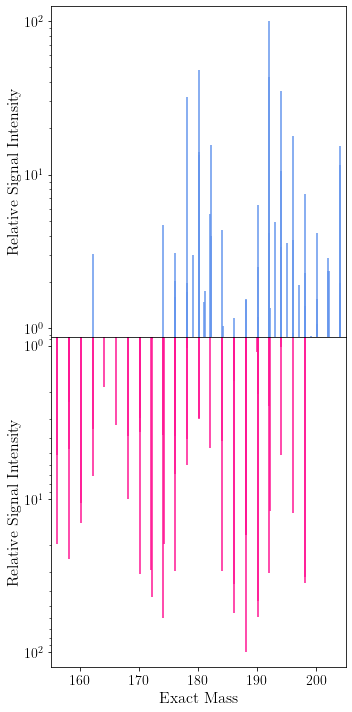

In [41]:
# for some flexibility, create a container for the figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), sharex=True) # create a figure object
#ax = fig.add_subplot(111) # create an axis object

# first, draw the experimental spectrum
axes[0].vlines(x=mass_list, ymin=0, ymax=normalized_abun, color='cornflowerblue')

# now the CNRN
axes[1].vlines(x=unique_sim_masses, ymin=0, ymax=norm_freq, color='deeppink')

#plt.bar(mass_list, rel_abundance, width=0.5)
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim([0.875, 125])
axes[1].set_ylim([0.875, 125])
axes[0].set_xlim([155, 205])
axes[1].set_xlim([155, 205])
plt.gca().invert_yaxis()
axes[0].tick_params(axis="y", labelsize=14)
axes[0].tick_params(axis="x", labelsize=14)
axes[1].tick_params(axis="y", labelsize=14)
axes[1].tick_params(axis="x", labelsize=14)
axes[1].set_xlabel('Exact Mass',fontsize=16)
axes[0].set_ylabel('Relative Signal Intensity',fontsize=16)
axes[1].set_ylabel('Relative Signal Intensity',fontsize=16)
#plt.ylabel('Normalized Abundance')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('formose_mirror_plot.png', dpi=500,transparent=True)
plt.show()
plt.close()




In [42]:
# Repat this for a new plot of spectrum : make a list of exact mass and relative abundance.
mass_list = []
rel_abundance = []
for i in range(len(df)):
    # allow entire spectrum for this one
    if float(df['Mass'].iloc[i]) < 750 and "No Hit" not in df['Molecular Formula'].iloc[i]:
        mass_list.append(float(df['Mass'].iloc[i]))
        rel_abundance.append(float(df['Rel. Abundance'].iloc[i]))
# now, "renormalize" the relative abundance.
highest = max(rel_abundance)
norm_factor = 100.0/highest
normalized_abun = []
for ab in rel_abundance:
    normalized_abun.append(norm_factor*ab)
print(f'{len(mass_list)} items in {mass_list}')

5965 items in [515.2916730000001, 277.066737, 291.082386, 305.098035, 319.11368, 333.129327, 361.16063199999996, 375.176292, 389.19194799999997, 403.207603, 261.071823, 275.087472, 289.103124, 303.118771, 331.150062, 345.165708, 359.181362, 373.197021, 235.05617999999998, 249.071821, 263.087471, 277.103125, 291.11877499999997, 319.150065, 333.165709, 347.181364, 361.19703, 265.066733, 279.082386, 293.098037, 307.113682, 321.129331, 349.160625, 363.176282, 377.19194699999997, 391.20759599999997, 303.082384, 317.09803, 331.113679, 345.129323, 373.160642, 387.17629, 401.191946, 415.207612, 429.22324199999997, 269.082781, 283.098434, 311.12971999999996, 273.07183399999997, 287.087474, 301.103119, 315.118767, 343.150063, 357.165717, 371.181372, 385.19703, 253.066737, 267.082391, 281.098037, 295.113686, 309.129332, 337.160625, 351.17627699999997, 365.191939, 319.077298, 333.092942, 347.108589, 361.124251, 375.139903, 403.171216, 417.18687, 431.202518, 445.218171, 459.233771, 223.056179999999

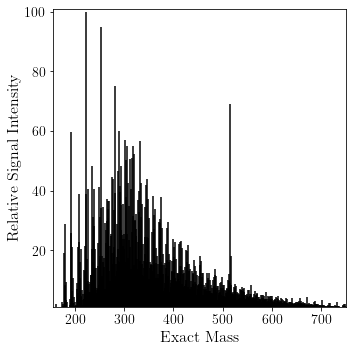

In [43]:
# for some flexibility, create a container for the figure
fig = plt.figure(figsize=(5, 5))

# first, draw the experimental spectrum
plt.vlines(x=mass_list, ymin=0, ymax=normalized_abun, color='black')


#plt.bar(mass_list, rel_abundance, width=0.5)
#axes[0].set_yscale('log')
#axes[1].set_yscale('log')
plt.ylim([0.875, 101])
#plt.gca().invert_yaxis()
plt.xlim(155, 750)
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.xlabel('Exact Mass',fontsize=16)
plt.ylabel('Relative Signal Intensity',fontsize=16)
#plt.ylabel('Normalized Abundance')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('formose_MS_plot.png', dpi=500,transparent=True)
plt.show()
plt.close()